In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as stat

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
temp_df = pd.DataFrame(df)

In [5]:
temp_df = temp_df.rename(columns={'parental level of education' : 'parents'})
temp_df.head()

,gender,race/ethnicity,parents,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
temp_df.drop(['lunch'], axis=1)
temp_df.head()

,gender,race/ethnicity,parents,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
average = temp_df[["math score", "reading score", "writing score"]].mean(axis=1).astype('int32')
average.head()

0    72
1    82
2    92
3    49
4    76
dtype: int32

In [8]:
temp_df['average'] = average
temp_df.head()

,gender,race/ethnicity,parents,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


C:\Users\abhil\AppData\Local\Temp\ipykernel_5336\292442305.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp_df.corr(), annot=True)


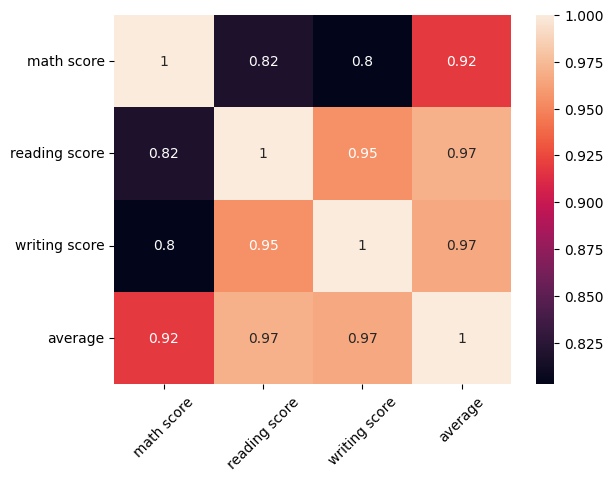

In [9]:
sns.heatmap(temp_df.corr(), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

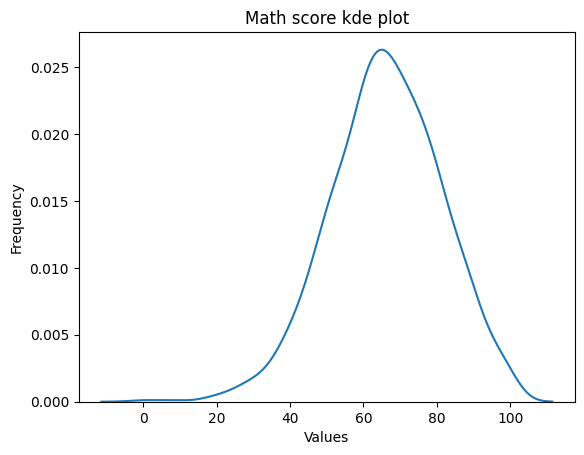

In [11]:
sns.kdeplot(temp_df["math score"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Math score kde plot")
plt.show()

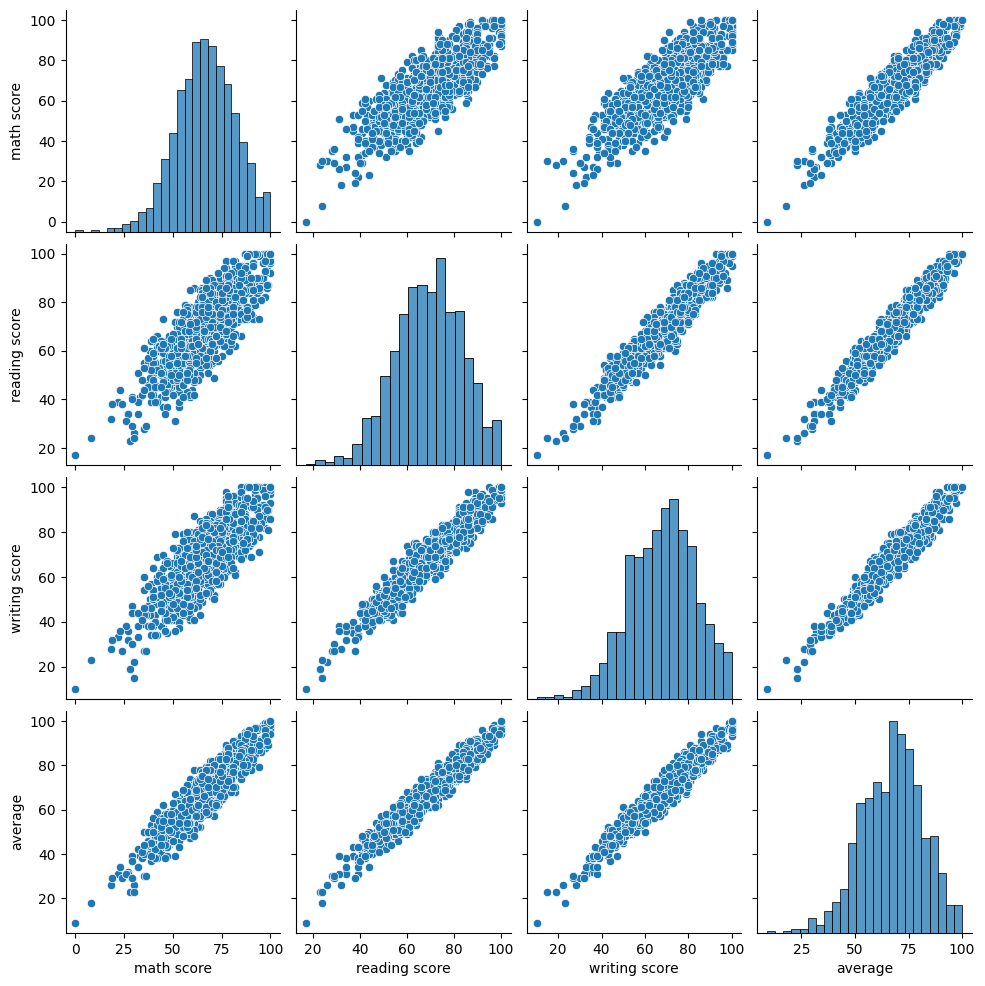

In [12]:
sns.pairplot(temp_df)
plt.show()

In [ ]:
race_df = temp_df.groupby(by="race/ethnicity").mean()
race_df

C:\Users\abhil\AppData\Local\Temp\ipykernel_12384\874049023.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  race_df = temp_df.groupby(by="race/ethnicity").mean()


,math score,reading score,writing score,average
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.696629
group B,63.452632,67.352632,65.600000,65.142105
group C,64.463950,69.103448,67.827586,66.789969
group D,67.362595,70.030534,70.145038,68.851145
group E,73.821429,73.028571,71.407143,72.450000


In [16]:
count_df = temp_df["race/ethnicity"].value_counts()
count_df


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

<AxesSubplot: xlabel='race/ethnicity', ylabel='count'>

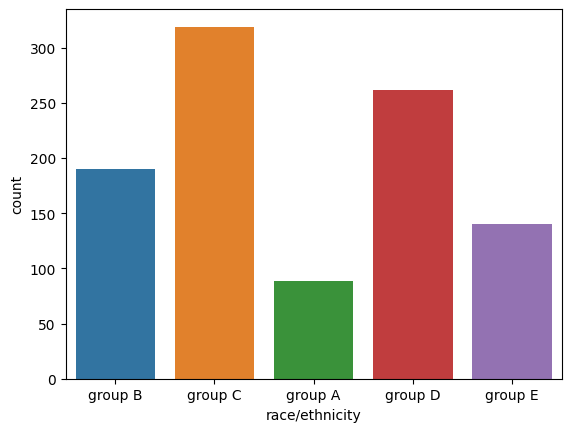

In [20]:
sns.countplot(x= temp_df["race/ethnicity"])

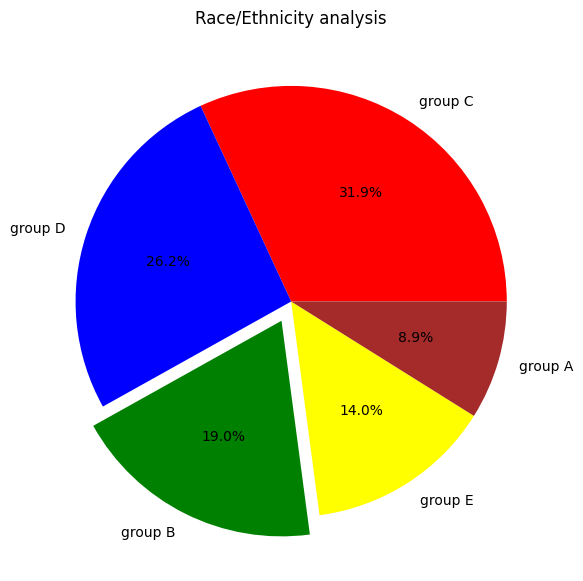

In [ ]:
labels = temp_df["race/ethnicity"].value_counts().index
values = temp_df["race/ethnicity"].value_counts().values
colors = ["red","blue","green","yellow","brown"]
explode = [0,0,0.1,0,0]

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%")
plt.title("Race/Ethnicity analysis")
plt.show()

In [ ]:
gender_df = temp_df.groupby(by="gender").mean()
gender_df

C:\Users\abhil\AppData\Local\Temp\ipykernel_12384\3555521702.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_df = temp_df.groupby(by="gender").mean()


,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.239382
male,68.728216,65.473029,63.311203,65.516598


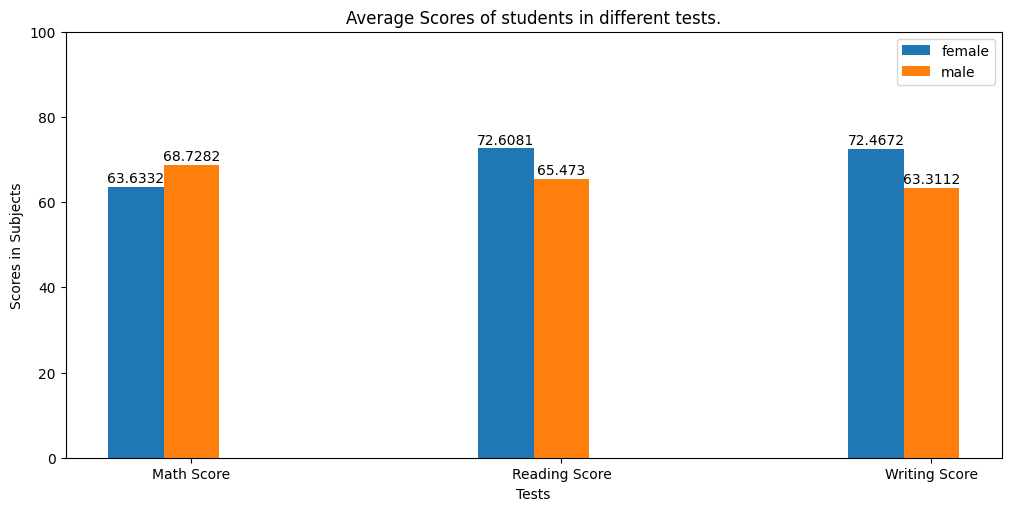

In [ ]:
tests = ("Math Score", "Reading Score", "Writing Score")
gender = {
    "female" : (63.633205,	72.608108,	72.467181),
    "male":	(68.728216,	65.473029,	63.311203),
}

x = np.arange(len(tests))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10,5))

for attribute, measurement in gender.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Tests")
ax.set_ylabel('Scores in Subjects')
ax.set_title("Average Scores of students in different tests.")
ax.set_xticks(x + len(gender)//2*width, tests)
ax.legend(loc='upper right')
ax.set_ylim(0, 100)

plt.show()

In [ ]:
parents_df = temp_df[["parents", "math score", "reading score", "writing score"]].groupby(by="parents").mean()
parents_df.head()

,math score,reading score,writing score
parents,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708


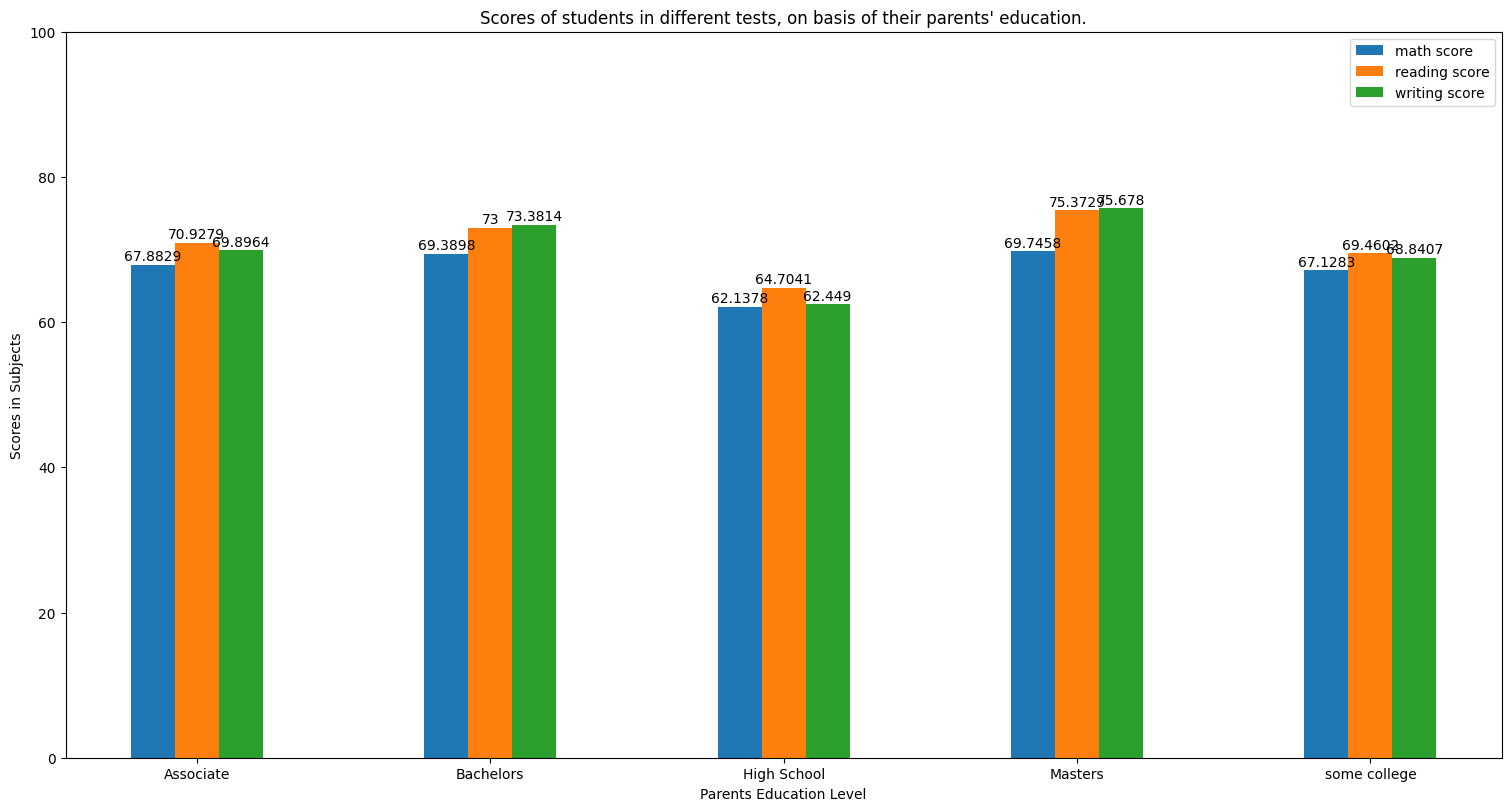

In [ ]:
parents = ("Associate", "Bachelors","High School","Masters","some college")
test = {
    "math score": (67.882883, 69.389831, 62.137755, 69.745763,	67.128319),
    "reading score": (70.927928,	73.000000,64.704082,75.372881,	69.460177),
    "writing score": (69.896396, 73.381356, 62.448980, 75.677966, 68.840708)
}

x = np.arange(len(parents))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(15,8))

for attribute, measurement in test.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim(0, 100)
ax.set_xlabel("Parents Education Level")
ax.set_ylabel('Scores in Subjects')
ax.set_title("Scores of students in different tests, on basis of their parents' education.")
ax.legend(loc='upper right')
ax.set_xticks(x + len(test)//2*width, parents)



plt.show()

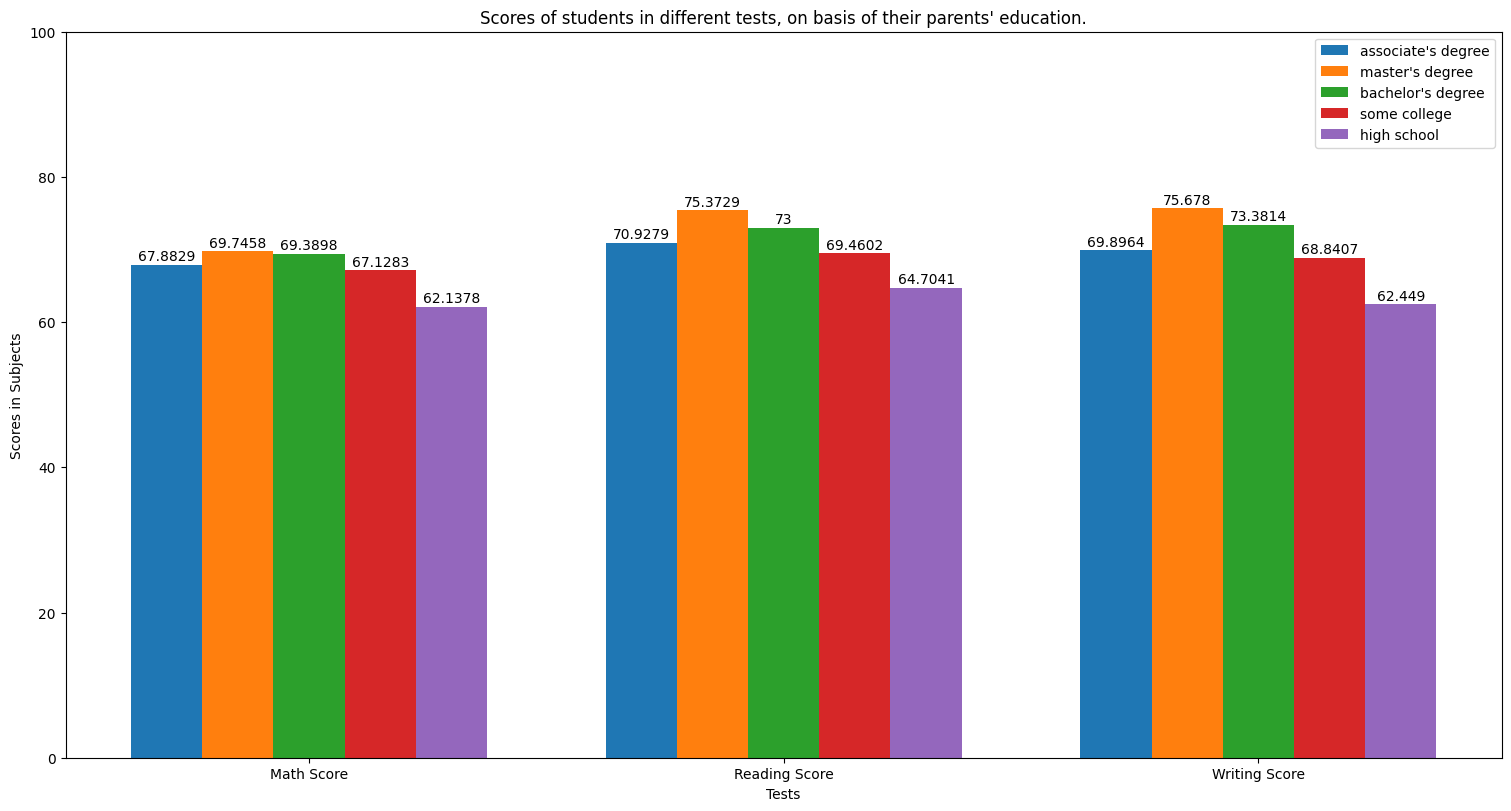

In [ ]:
tests = ("Math Score", "Reading Score", "Writing Score")
degree = {
    "associate's degree" : (67.882883,	70.927928,	69.896396),
    "master's degree":	(69.745763,	75.372881,	75.677966),
    "bachelor's degree":	(69.389831,	73.000000,	73.381356),
    "some college":	(67.128319,	69.460177,	68.840708),
    "high school":	(62.137755,	64.704082,	62.448980)
    
}

x = np.arange(len(tests))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(15,8))

for attribute, measurement in degree.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Tests")
ax.set_ylabel('Scores in Subjects')
ax.set_title("Scores of students in different tests, on basis of their parents' education.")
ax.set_xticks(x + len(degree)//2*width, tests)
ax.legend(loc='upper right')
ax.set_ylim(0, 100)

plt.show()

In [ ]:
preparation_df = temp_df[["test preparation course", "math score", "reading score", "writing score"]].groupby(by="test preparation course").mean()
preparation_df

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


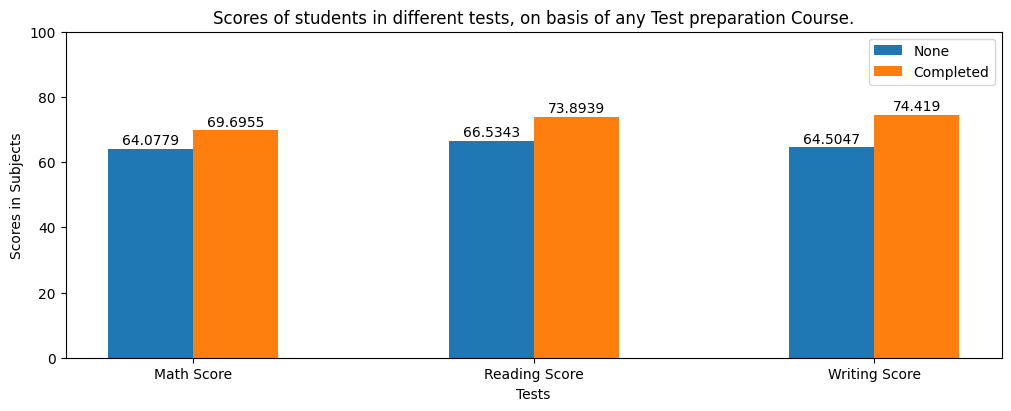

In [ ]:
tests = ("Math Score", "Reading Score", "Writing Score")
scores = {
    'None': (64.077882,	66.534268,	64.504673),
    'Completed': (69.695531, 73.893855,	74.418994)
}

x = np.arange(len(tests))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10,4))

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Tests')
ax.set_ylabel('Scores in Subjects')
ax.set_title('Scores of students in different tests, on basis of any Test preparation Course.')
ax.set_xticks(x + 0.5*width, tests)
ax.legend(loc='upper right')
ax.set_ylim(0, 100)

plt.show()